In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**EDA - 1**

In [9]:
import pandas as pd

file_path = '/content/drive/MyDrive/PW Assignments/BIKE DETAILS.csv'
df = pd.read_csv(file_path)
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [10]:
#1. What is the range of selling prices in the dataset ?

price_range = (df['selling_price'].min(), df['selling_price'].max())
print(f"Range of selling prices: ₹{price_range[0]} to ₹{price_range[1]}")

Range of selling prices: ₹5000 to ₹760000


In [11]:
#2. What is the median selling price for bikes in the dataset ?

median_price = df['selling_price'].median()
print(f"Median selling price: ₹{median_price}")

Median selling price: ₹45000.0


In [12]:
#3. What is the most common seller type ?

most_common_seller = df['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller}")

Most common seller type: Individual


In [13]:
#4. How many bikes have driven more than 50,000 kilometers ?

count_50k = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes driven more than 50,000 km: {count_50k}")

Bikes driven more than 50,000 km: 170


In [14]:
#5. What is the average km_driven value for each ownership type ?

avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [15]:
#6. What proportion of bikes are from the year 2015 or older ?

proportion = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


In [26]:
#7. What is the trend of missing values across the dataset ?

missing_values = df.isnull().sum()
print("Missing Values:\n\n", missing_values)

Missing Values:

 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [27]:
#8. What is the highest ex_showroom_price recorded, and for which bike ?

max_price = df['ex_showroom_price'].max()
bike_name = df[df['ex_showroom_price'] == max_price]['name'].values[0]
print(f"Highest ex-showroom price: ₹{max_price} for {bike_name}")

Highest ex-showroom price: ₹1278000.0 for Harley-Davidson Street Bob


In [28]:
#9. What is the total number of bikes listed by each seller type ?

seller_counts = df['seller_type'].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [29]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes ?

first_owner = df[df['owner'] == '1st owner']
correlation = first_owner[['selling_price', 'km_driven']].corr().iloc[0, 1]
print(f"Correlation (selling_price vs km_driven for first owners): {correlation:.2f}")

Correlation (selling_price vs km_driven for first owners): -0.24


In [30]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
removed = df.shape[0] - df_clean.shape[0]

print(f"Outliers removed in 'km_driven': {removed}")

Outliers removed in 'km_driven': 39


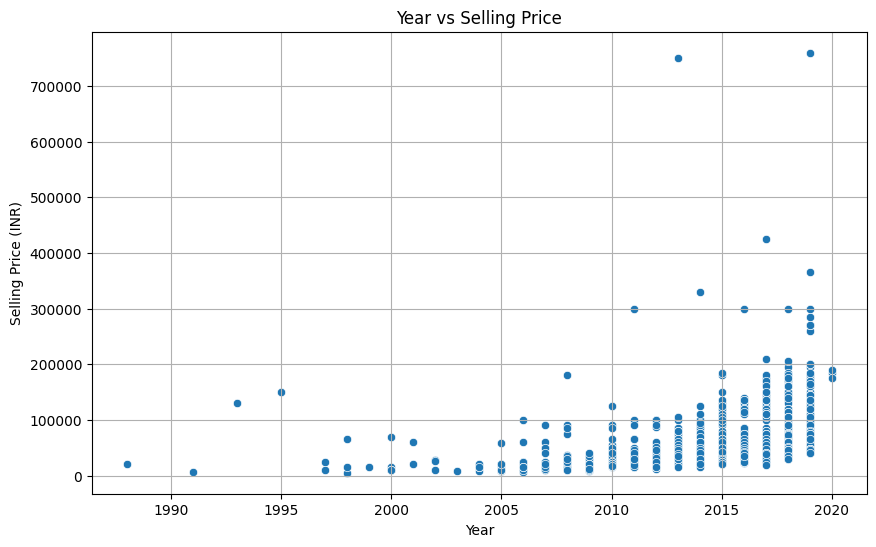

In [31]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()

In [34]:
#13. What is the average depreciation in selling price based on the bike's age ?

df['age'] = 2025 - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
depreciation_by_age = df.groupby('age:')['depreciation'].mean()
print(depreciation_by_age.head())

age:
5   -34260.000000
6     2954.562500
7    13023.194805
8    22306.082353
9    28328.190476
Name: depreciation, dtype: float64


In [35]:
#14. Which bike names are priced significantly above the average price for their manufacturing year ?

yearly_avg = df.groupby('year')['selling_price'].mean()
df['avg_price_for_year'] = df['year'].map(yearly_avg)
df['above_avg'] = df['selling_price'] > 1.5 * df['avg_price_for_year']

above_avg_bikes = df[df['above_avg']][['name', 'year', 'selling_price', 'avg_price_for_year']]
print(above_avg_bikes.head())

                                    name  year  selling_price  \
2    Royal Enfield Classic Gunmetal Grey  2018         150000   
7   Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                         Yamaha YZF R3  2019         365000   
18   Royal Enfield Classic Gunmetal Grey  2018         150000   
23                         Jawa Standard  2019         180000   

    avg_price_for_year  
2         87660.374046  
7         34289.285714  
13       119689.511628  
18        87660.374046  
23       119689.511628  


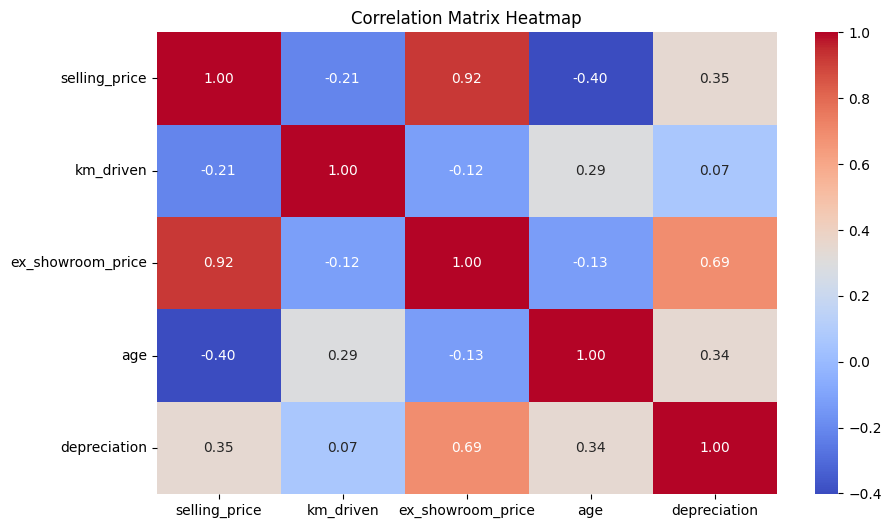

In [36]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric = df[['selling_price', 'km_driven', 'ex_showroom_price', 'age', 'depreciation']]
corr_matrix = numeric.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

#**EDA - 2**

In [5]:
import pandas as pd

file_path = '/content/drive/MyDrive/PW Assignments/Car Sale.csv'
car_df = pd.read_csv(file_path)
car_df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [6]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

dealer_avg_price = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(dealer_avg_price.head(10))

Dealer_Name
U-Haul CO                            28769.919006
Classic Chevy                        28602.014446
Rabun Used Car Sales                 28527.536177
Iceberg Rentals                      28522.958533
Enterprise Rent A Car                28312.580800
Scrivener Performance Engineering    28297.371589
Gartner Buick Hyundai Saab           28247.621019
Saab-Belle Dodge                     28190.139888
Capitol KIA                          28189.703822
Race Car Help                        28163.372706
Name: Price ($), dtype: float64


In [7]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?

brand_variation = car_df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(brand_variation.head(10))

Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Buick       17142.232626
Mercury     16445.172195
Nissan      16214.264017
Saturn      15990.223671
Ford        15849.090227
Name: Price ($), dtype: float64


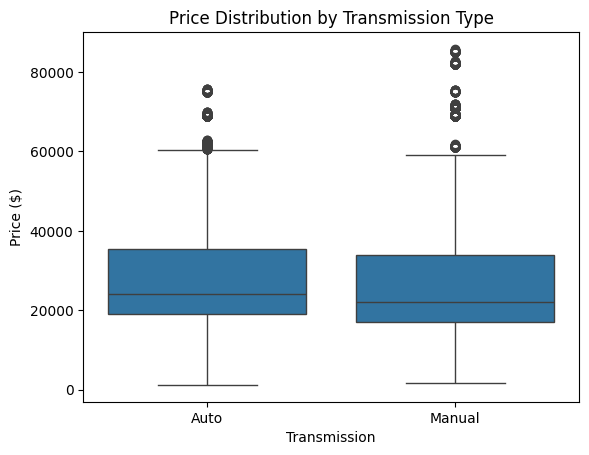

In [8]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Transmission', y='Price ($)', data=car_df)
plt.title('Price Distribution by Transmission Type')
plt.show()

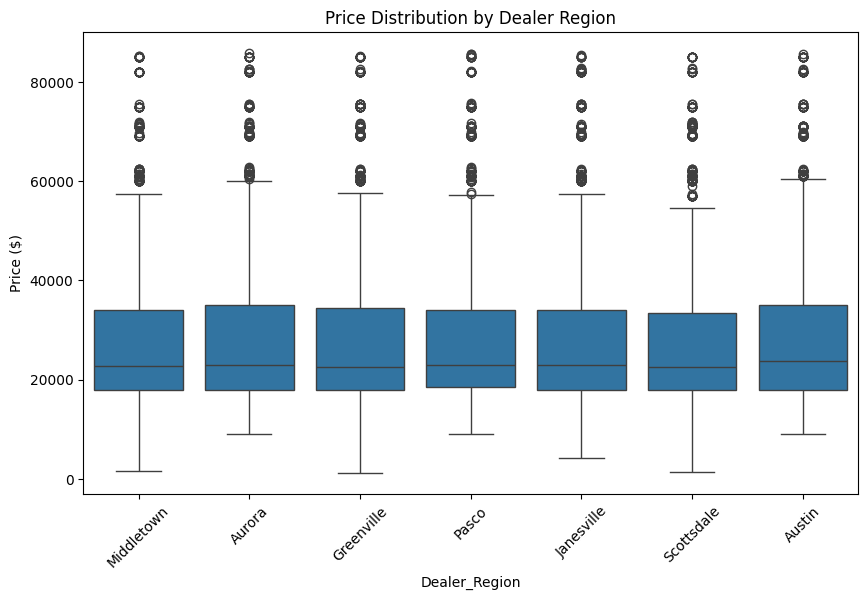

In [9]:
#4. What is the distribution of car prices across different regions ?

plt.figure(figsize=(10,6))
sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)')
plt.xticks(rotation=45)
plt.title('Price Distribution by Dealer Region')
plt.show()

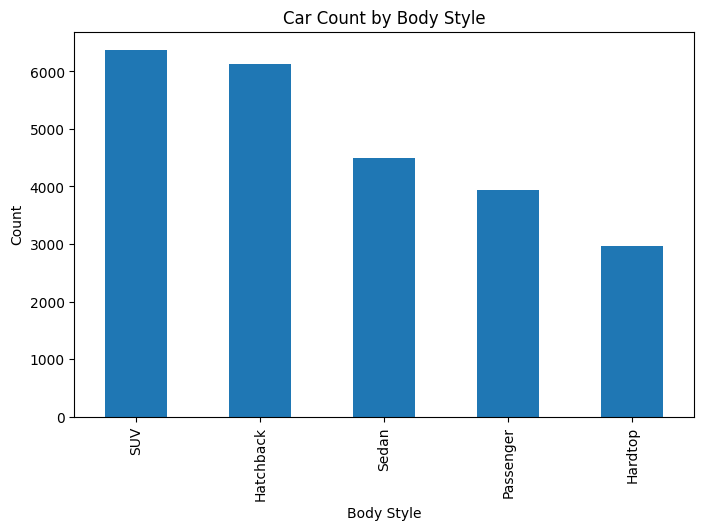

In [10]:
#5. What is the distribution of cars based on body styles ?

car_df['Body Style'].value_counts().plot(kind='bar', figsize=(8,5), title='Car Count by Body Style')
plt.ylabel('Count')
plt.show()

In [11]:
#6. How does the average selling price of cars vary by customer gender and annual income ?

gender_income_price = car_df.groupby('Gender')[['Annual Income', 'Price ($)']].mean()
print(gender_income_price)

        Annual Income     Price ($)
Gender                             
Female  755973.021339  28277.265270
Male    851184.044207  28039.429407


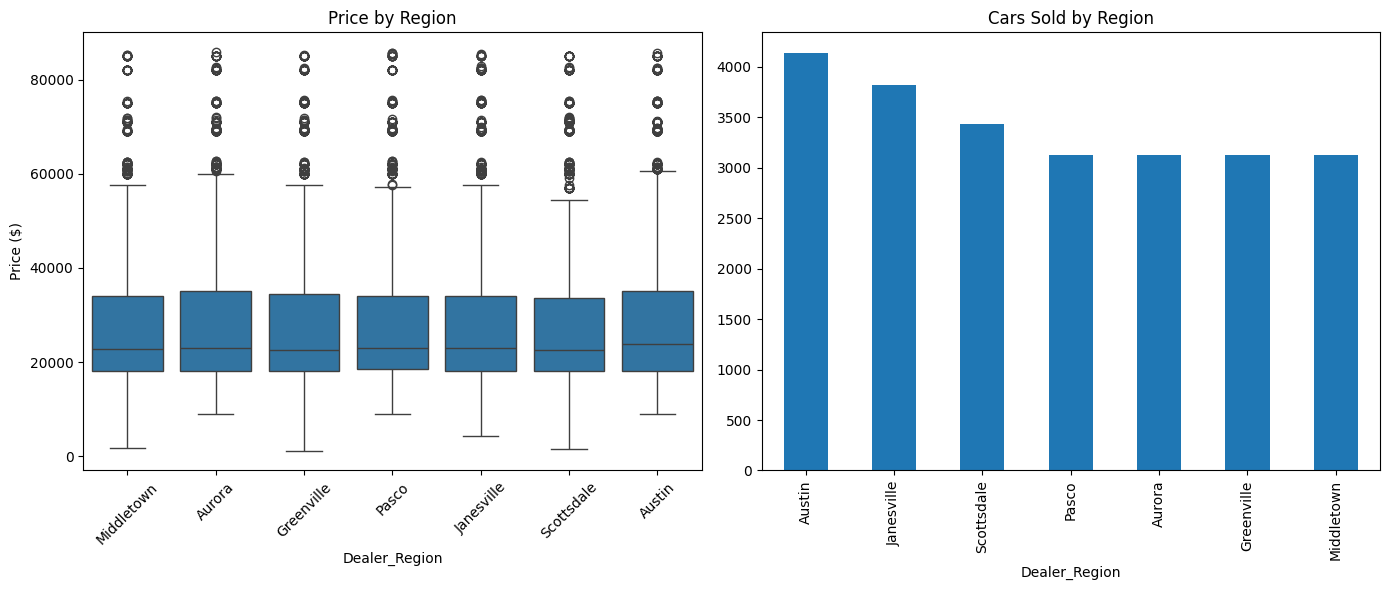

In [12]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

fig, ax = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)', ax=ax[0])
ax[0].set_title('Price by Region')
ax[0].tick_params(axis='x', rotation=45)

car_df['Dealer_Region'].value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('Cars Sold by Region')

plt.tight_layout()
plt.show()

In [13]:
#8. How does the average car price differ between cars with different engine sizes ?

engine_price = car_df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print(engine_price.head())

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [14]:
#9. How do car prices vary based on the customer’s annual income bracket ?

bins = [0, 50000, 100000, 250000, 500000, 1000000, 2000000]
labels = ['<50k', '50k-100k', '100k-250k', '250k-500k', '500k-1M', '1M+']
car_df['Income Bracket'] = pd.cut(car_df['Annual Income'], bins=bins, labels=labels)

income_price = car_df.groupby('Income Bracket')['Price ($)'].mean()
print(income_price)

Income Bracket
<50k         27884.297820
50k-100k     43000.000000
100k-250k    28944.688889
250k-500k    28555.392229
500k-1M      28011.726423
1M+          28016.841147
Name: Price ($), dtype: float64


<ipython-input-14-f660f9a0856e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_price = car_df.groupby('Income Bracket')['Price ($)'].mean()


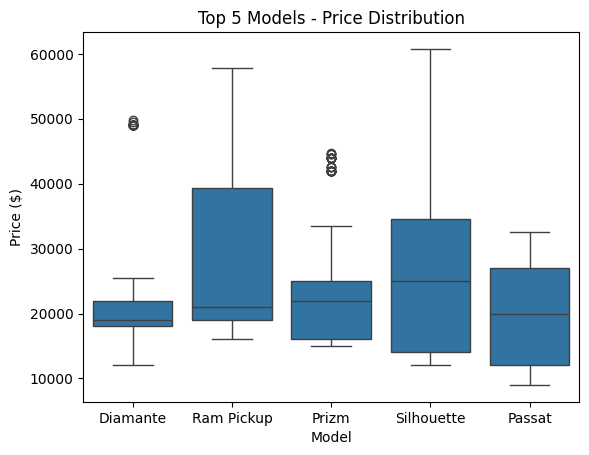

In [15]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

top_models = car_df['Model'].value_counts().head(5).index
top_model_prices = car_df[car_df['Model'].isin(top_models)]

sns.boxplot(data=top_model_prices, x='Model', y='Price ($)')
plt.title('Top 5 Models - Price Distribution')
plt.show()

In [16]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation ?

color_variation = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print(color_variation.head(10))

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


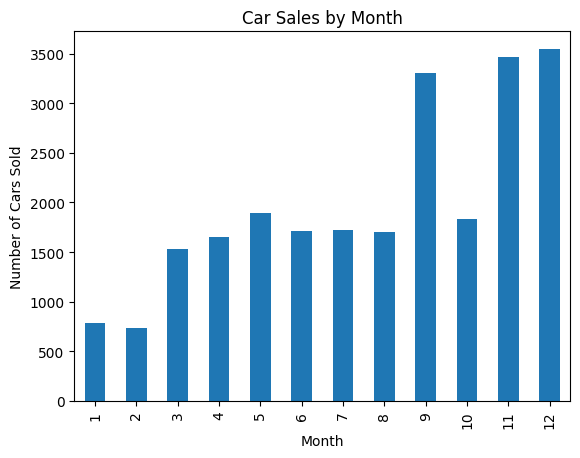

In [17]:
#12. Is there any seasonal trend in car sales based on the date of sale ?

car_df['Date'] = pd.to_datetime(car_df['Date'])
car_df['Month'] = car_df['Date'].dt.month

monthly_sales = car_df['Month'].value_counts().sort_index()
monthly_sales.plot(kind='bar', title='Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.show()

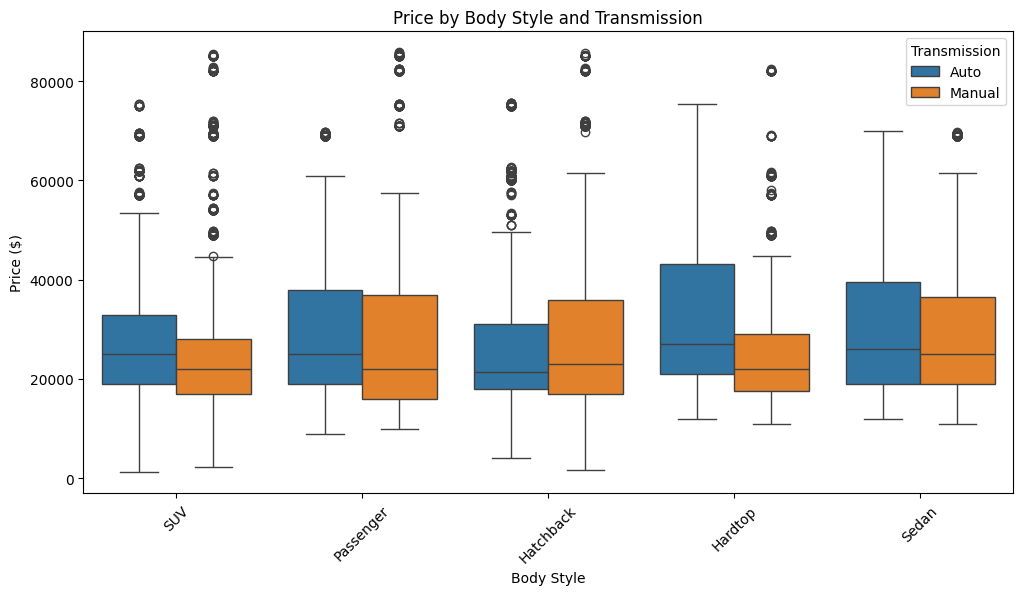

In [18]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type ?

plt.figure(figsize=(12,6))
sns.boxplot(data=car_df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Price by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()

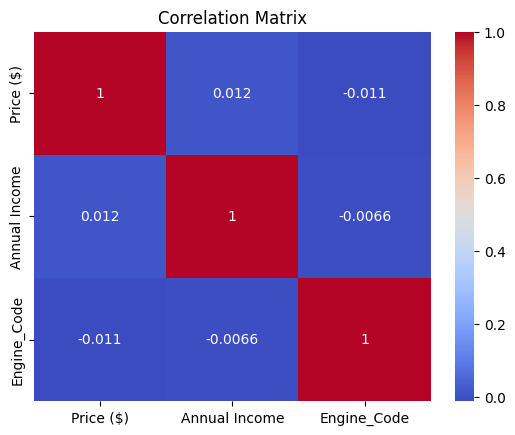

In [19]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact ?

car_df['Engine_Code'] = car_df['Engine'].astype('category').cat.codes

corr_matrix = car_df[['Price ($)', 'Annual Income', 'Engine_Code']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
#15. How does the average car price vary across different car models and engine types ?

avg_price_model_engine = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_model_engine.head(10))

Model        Engine                   
SC           Overhead Camshaft            61074.818182
Ranger       DoubleÂ Overhead Camshaft    61064.055556
Sable        Overhead Camshaft            61039.770833
Catera       DoubleÂ Overhead Camshaft    56836.933333
LX470        Overhead Camshaft            54037.490196
LS400        Overhead Camshaft            53157.941558
GS400        Overhead Camshaft            53086.000000
Tacoma       DoubleÂ Overhead Camshaft    53085.821918
Aurora       Overhead Camshaft            51833.556962
Park Avenue  DoubleÂ Overhead Camshaft    49387.750000
Name: Price ($), dtype: float64


#**EDA - 3**

In [22]:
import pandas as pd

file_path = '/content/drive/MyDrive/PW Assignments/amazon.csv'
amazon_df = pd.read_csv(file_path)
amazon_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [23]:
#1. What is the average rating for each product category ?

amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')
category_avg_rating = amazon_df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(category_avg_rating.head(10))

category
Computers&Accessories|Tablets                                                                 4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                      4.5
Electronics|Cameras&Photography|Accessories|Film                                              4.5
Computers&Accessories|Components|Memory                                                       4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                  4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                            4.5
HomeImprovement|Electrical|CordManagement                                                     4.5
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses                         4.5
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories    4.5
Electronics|PowerAccessories|SurgeProtectors                                                  4.5
Name: ratin

In [24]:
#2. What are the top rating_count products by category ?

amazon_df['rating_count'] = amazon_df['rating_count'].str.replace(',', '').astype(float)
top_products = amazon_df.groupby('category').apply(lambda x: x.sort_values('rating_count', ascending=False).head(1))
top_products = top_products[['product_name', 'rating_count']]
print(top_products)

                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 748   JBL Commercial CSLM20B Auxiliary Omnidirection...   
Computers&Accessories|Accessories&Peripherals|A... 844   Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   Classmate Octane Neon- Blue Gel Pens(Pack of 5...   
OfficeProd

<ipython-input-24-a2d7bea9576a>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = amazon_df.groupby('category').apply(lambda x: x.sort_values('rating_count', ascending=False).head(1))


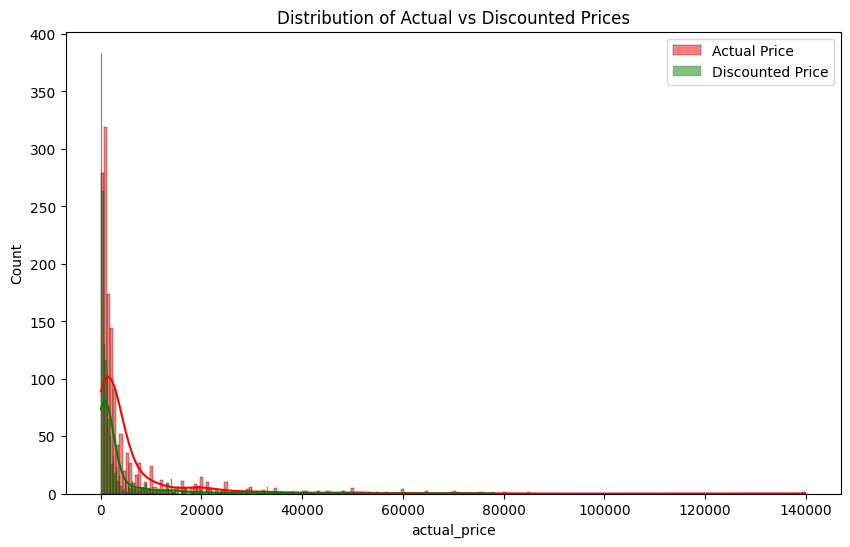

In [25]:
#3. What is the distribution of discounted prices vs. actual prices ?

amazon_df['discounted_price'] = amazon_df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_df['actual_price'] = amazon_df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(amazon_df['actual_price'], label='Actual Price', kde=True, color='red')
sns.histplot(amazon_df['discounted_price'], label='Discounted Price', kde=True, color='green')
plt.legend()
plt.title('Distribution of Actual vs Discounted Prices')
plt.show()

In [26]:
#4. How does the average discount percentage vary across categories ?

amazon_df['discount_percentage'] = amazon_df['discount_percentage'].str.replace('%', '').astype(float)
avg_discount = amazon_df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print(avg_discount.head(10))

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    87.5
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                       82.0
Computers&Accessories|Components|InternalHardDrives                                                              80.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                          78.5
Electronics|Mobiles&Accessories|MobileAccessori

In [27]:
#5. What are the most popular product names ?

popular_products = amazon_df.sort_values('rating_count', ascending=False)[['product_name', 'rating_count']].head(10)
print(popular_products)

                                          product_name  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0


In [28]:
#6. What are the most popular product keywords ?

from collections import Counter
import re

keywords = []

for name in amazon_df['product_name']:
    words = re.findall(r'\w+', str(name).lower())
    keywords.extend(words)

common_keywords = Counter(keywords).most_common(20)
print(common_keywords)

[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267), ('charging', 247), ('type', 243), ('to', 219), ('fast', 212), ('in', 178), ('smart', 175), ('white', 170), ('tv', 152), ('compatible', 146), ('5', 137)]


In [29]:
#7. What are the most popular product reviews ?

# Split and flatten review_title column
review_titles = amazon_df['review_title'].dropna().str.split(',').explode()
popular_reviews = review_titles.value_counts().head(10)
print(popular_reviews)

review_title
Good               691
Good product       443
Value for money    183
Nice               171
Nice product       150
Good quality        99
Good Product        81
Ok                  80
Good one            76
good                54
Name: count, dtype: int64


In [30]:
#8. What is the correlation between discounted_price and rating ?

correlation = amazon_df[['discounted_price', 'rating']].corr()
print("Correlation between discounted_price and rating:\n", correlation)

Correlation between discounted_price and rating:
                   discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [31]:
#9. What are the top 5 categories based on the highest ratings ?

top_categories = amazon_df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [32]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

print("""
1. Some high-rated products have very few reviews — increasing visibility for these may help boost sales.
2. Categories with high discounts but low ratings might need better quality control or reviews.
3. Several product names share keywords — optimization of SEO with unique branding may be beneficial.
4. Encourage verified reviews for categories with low rating_count.
""")


1. Some high-rated products have very few reviews — increasing visibility for these may help boost sales.
2. Categories with high discounts but low ratings might need better quality control or reviews.
3. Several product names share keywords — optimization of SEO with unique branding may be beneficial.
4. Encourage verified reviews for categories with low rating_count.



#**EDA - 4**

In [34]:
import pandas as pd

file_path = '/content/drive/MyDrive/PW Assignments/spotify.csv'
spotify_df = pd.read_csv(file_path)
spotify_df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [35]:
#1. Read the dataframe, check null values if present, then do the needful. Also check duplicate rows.

# Check nulls
print("Missing values:\n", spotify_df.isnull().sum())

# Drop rows with missing values (if any)
spotify_df.dropna(inplace=True)

# Check duplicates
duplicates = spotify_df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Drop duplicates (if any)
spotify_df.drop_duplicates(inplace=True)

Missing values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


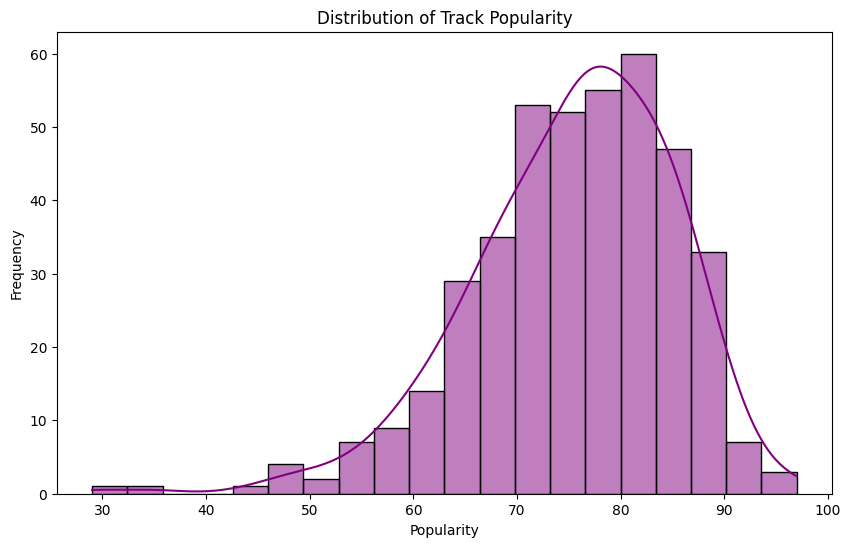

In [36]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(spotify_df['Popularity'], bins=20, kde=True, color='purple')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

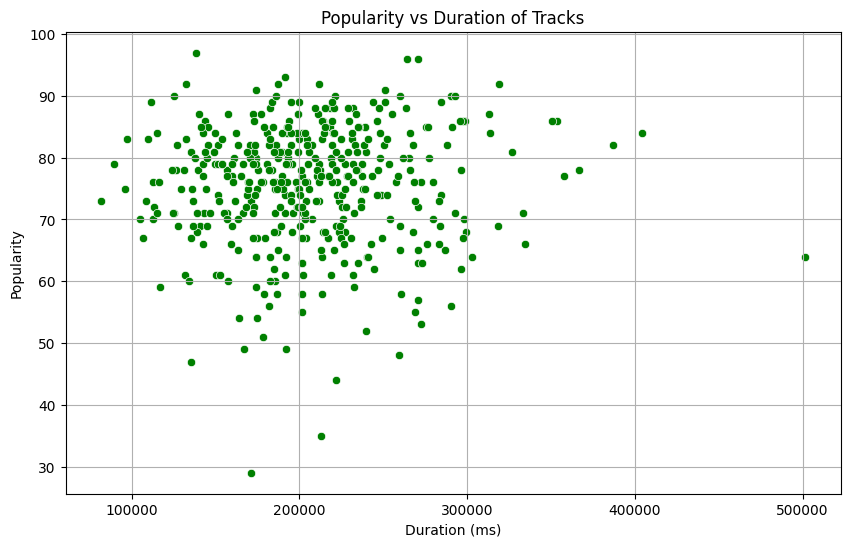

In [37]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore using a scatter plot.

plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_df, color='green')
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()

<ipython-input-38-f0a52ebd5eec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


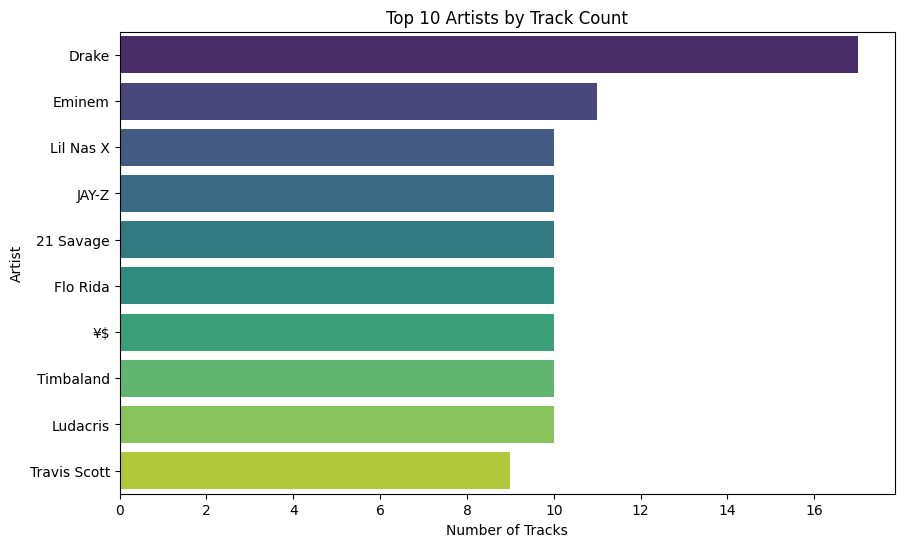

In [38]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

top_artists = spotify_df['Artist'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

In [39]:
#5. What are the top 5 least popular tracks? Provide the artist name and track name for each.

least_popular = spotify_df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular)

             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [40]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average ?

top_5_artists = spotify_df['Artist'].value_counts().head(5).index
top_artist_avg_popularity = spotify_df[spotify_df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(top_artist_avg_popularity)

Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [41]:
#7. For the top 5 most popular artists, what are their most popular tracks ?

top_tracks = spotify_df[spotify_df['Artist'].isin(top_5_artists)]
top_tracks_by_artist = top_tracks.sort_values(['Artist', 'Popularity'], ascending=[True, False]).groupby('Artist').first().reset_index()
print(top_tracks_by_artist[['Artist', 'Track Name', 'Popularity']])

      Artist                               Track Name  Popularity
0  21 Savage                                   redrum          96
1      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
2     Eminem                               Without Me          90
3      JAY-Z                          Ni**as In Paris          86
4  Lil Nas X                        THATS WHAT I WANT          81


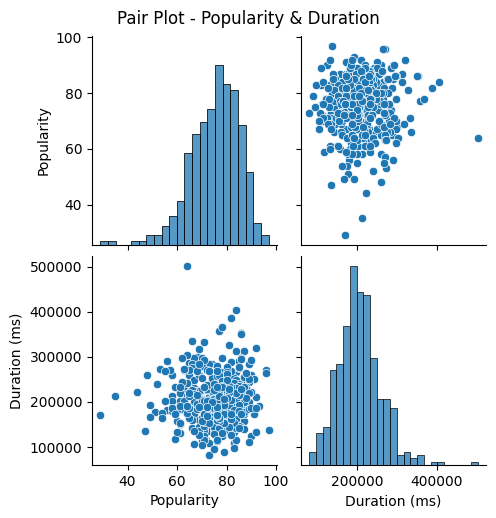

In [42]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(spotify_df[['Popularity', 'Duration (ms)']])
plt.suptitle("Pair Plot - Popularity & Duration", y=1.02)
plt.show()

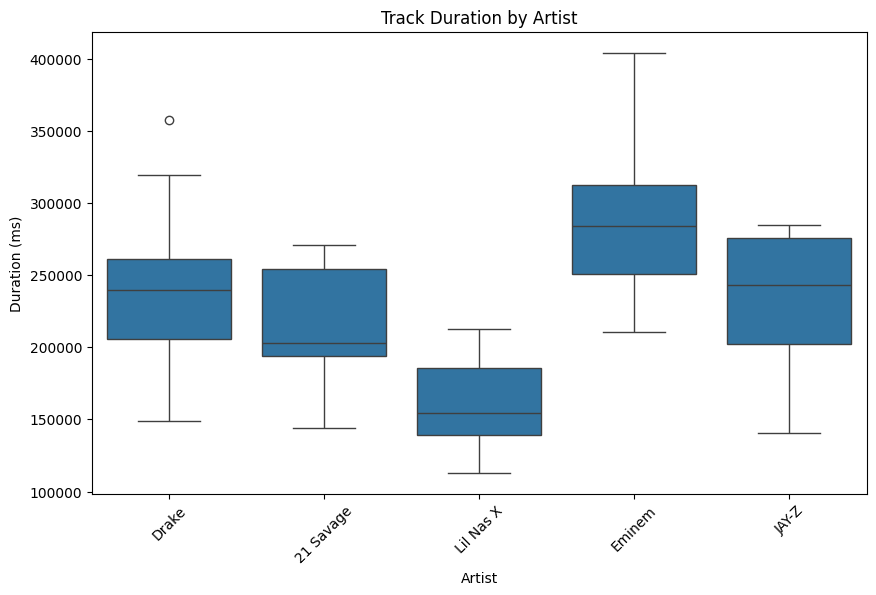

In [43]:
#9. Does the duration of tracks vary significantly across different artists? Use boxplot or violin plot.

top_artists_for_plot = spotify_df['Artist'].value_counts().head(5).index
subset_df = spotify_df[spotify_df['Artist'].isin(top_artists_for_plot)]

plt.figure(figsize=(10,6))
sns.boxplot(x='Artist', y='Duration (ms)', data=subset_df)
plt.title("Track Duration by Artist")
plt.xticks(rotation=45)
plt.show()

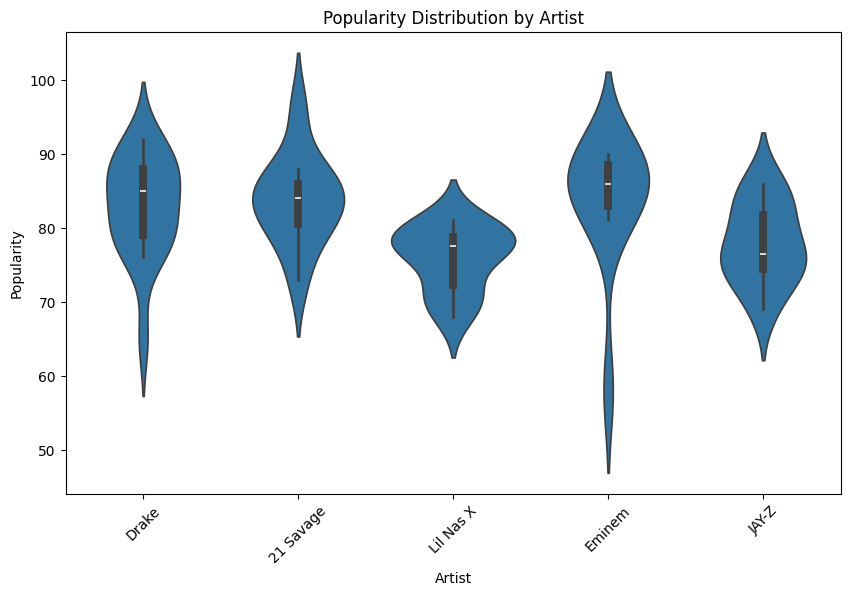

In [44]:
#10. How does the distribution of track popularity vary for different artists? Visualize using a swarm or violin plot.

plt.figure(figsize=(10,6))
sns.violinplot(x='Artist', y='Popularity', data=subset_df)
plt.title("Popularity Distribution by Artist")
plt.xticks(rotation=45)
plt.show()